# REGRESIÓN LINEAL
### Introducción
Importamos los paquetes de Python que vamos a necesitar:

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

y creamos el dataset de alturas y pesos:

In [2]:
df = pd.DataFrame({'altura':[180, 164, 172, 167, 176, 184, 161, 191, 178, 175, 160, 177], 
                   'peso':[87, 48, 80, 60, 85, 98, 55, 86, 66, 75, 60, 76]})
df

,altura,peso
0,180,87
1,164,48
2,172,80
3,167,60
4,176,85
5,184,98
6,161,55
7,191,86
8,178,66
9,175,75


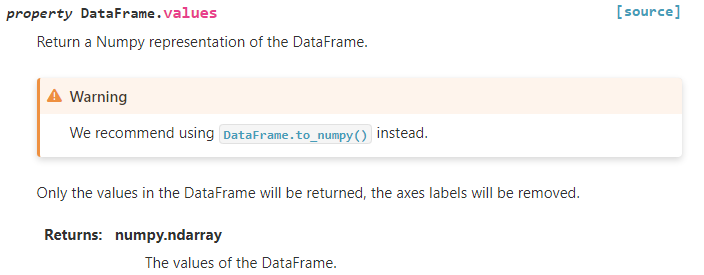

In [3]:
df.values 

array([[180,  87],
       [164,  48],
       [172,  80],
       [167,  60],
       [176,  85],
       [184,  98],
       [161,  55],
       [191,  86],
       [178,  66],
       [175,  75],
       [160,  60],
       [177,  76]], dtype=int64)

In [4]:
df['altura'].values

array([180, 164, 172, 167, 176, 184, 161, 191, 178, 175, 160, 177],
      dtype=int64)

### Justificación del nombre "regresión **lineal**"

Vemos que los puntos (altura,2*altura+5) están alineados:

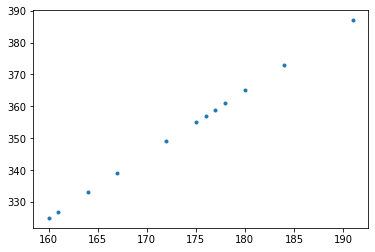

In [5]:
df['2*altura + 5'] = 2*df.altura.values+5
plt.plot(df.altura.values, df['2*altura + 5'].values, '.'); plt.show()

### Cálculo del error RMSE

El RMSE entre el peso y 2*altura+5 es:

In [6]:
df_rmse = df.copy()
df_rmse['xi-yi'] = df_rmse.peso - (2*df_rmse.altura + 5)
df_rmse['(xi-yi)^2'] = (df_rmse.peso - (5+2*df_rmse.altura))**2
df_rmse.loc['media', ['altura', 'peso', '2*altura + 5', 'xi-yi', '(xi-yi)^2']] = ['', '', '', '', np.mean(df_rmse['(xi-yi)^2'])]
df_rmse.loc['RMSE', ['altura', 'peso', '2*altura + 5', 'xi-yi', '(xi-yi)^2']] = ['', '', '', '', np.sqrt(df_rmse.loc['media', '(xi-yi)^2'])]
df_rmse['(xi-yi)^2'] = np.round(df_rmse['(xi-yi)^2'], 1)
df_rmse

,altura,peso,2*altura + 5,xi-yi,(xi-yi)^2
0,180.0,87.0,365.0,-278.0,77284.0
1,164.0,48.0,333.0,-285.0,81225.0
2,172.0,80.0,349.0,-269.0,72361.0
3,167.0,60.0,339.0,-279.0,77841.0
4,176.0,85.0,357.0,-272.0,73984.0
5,184.0,98.0,373.0,-275.0,75625.0
6,161.0,55.0,327.0,-272.0,73984.0
7,191.0,86.0,387.0,-301.0,90601.0
8,178.0,66.0,361.0,-295.0,87025.0
9,175.0,75.0,355.0,-280.0,78400.0


Alternativamente, se descarga el error MSE de Scikit-Learn y se hace su raíz cuadrada:

In [7]:
from sklearn.metrics import mean_squared_error as mse
rmse = lambda x, y: np.sqrt(mse(x, y))
rmse(df['peso'], df['2*altura + 5'])

279.6789826449841

Y vemos que coincide el número (en la tabla se ha redondeado a un decimal). 
### Fijar un modelo lineal
Calculamos ahora la óptima recta de regresión para altura vs. peso:

In [8]:
from sklearn.linear_model import LinearRegression as lm
X, y = df.altura.values.reshape(-1, 1), df.peso.values
fitted_mod = lm().fit(X, y)

Para calcular los coeficientes que se multiplican con las variables (en este caso solamente A) usamos el atributo *coef_*, y para el coeficiente libre, *intercept_*:

In [9]:
fitted_mod.coef_, fitted_mod.intercept_

(array([1.34224736]), -160.21547955772695)

Así pues, la recta óptima es $peso = 1.34224736 \cdot altura - 160.21547955772695$.
### Un dataset para el cual un modelo lineal es inapropiado:
Tomemos ahora el dato data1.csv, y representemos el dato contenido en él:

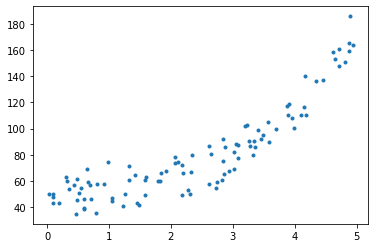

In [10]:
df = pd.read_csv('data1.csv')
plt.plot(df.col1.values, df.col2.values, '.'); plt.show()

Fijamos mediante mínimos cuadrados un modelo lineal tomando como variable explicativa a col1, y de salida a col2:

In [11]:
X, y = df.col1.values.reshape(-1, 1), df.col2.values
fitted_mod = lm().fit(X, y)

Si pintamos la variable de salida real (col2) vs. la predicción del modelo:

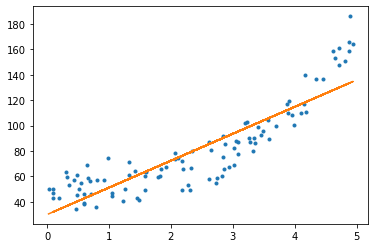

In [12]:
plt.plot(df.col1.values, df.col2.values, '.')
plt.plot(df.col1.values, fitted_mod.predict(X)); plt.show()

mientras que el RMSE es:

In [13]:
rmse(df.col2.values, fitted_mod.predict(X))

16.554928774453877

Sin embargo, si fijamos otro tipo de regresión (en este ejemplo se fija una regresión polinómica), el error RMSE es menor que el RMSE anterior, que era el menor error posible con regresión lineal:

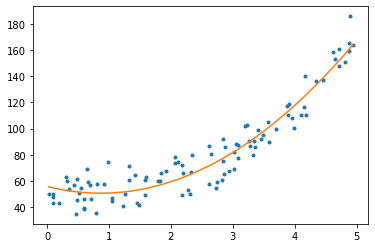

RMSE: 10.255197731739397


In [14]:
from sklearn.preprocessing import PolynomialFeatures
plt.plot(df.col1, df.col2, '.')
col1_sorted = np.array(sorted(df.col1))
pol_feat = PolynomialFeatures(2).fit(X)
Xpol = pol_feat.transform(X)
Xpol_predict = pol_feat.transform(col1_sorted.reshape(-1, 1))
plt.plot(col1_sorted, lm().fit(Xpol, y).predict(Xpol_predict)); plt.show()
print('RMSE:', rmse(y, lm().fit(Xpol, y).predict(Xpol)))

### Un último ejemplo - Repaso, multicolinealidad y VIF
Abordemos un último dataset, que en este caso relaciona el precio de unas viviendas en función de sus características principales:

In [15]:
df = pd.read_csv('casas.csv')
df

,Metros,Habitaciones,Balcon,Baños,Zona,Precio
0,80,3,No,1,Periferia,220000
1,76,2,Sí,1,Centro,210000
2,50,1,Sí,1,Centro,165000
3,97,3,Sí,2,Centro,260000
4,125,4,Sí,2,Periferia,380000
5,83,4,No,2,Centro,270000
6,100,3,No,1,Periferia,220000


En primer lugar tenemos que preprocesar las columnas Balcón y Zona:

In [16]:
from sklearn.preprocessing import LabelEncoder as le
df.Balcon = le().fit_transform(df.Balcon)
df.Zona = le().fit_transform(df.Zona)
df

,Metros,Habitaciones,Balcon,Baños,Zona,Precio
0,80,3,0,1,1,220000
1,76,2,1,1,0,210000
2,50,1,1,1,0,165000
3,97,3,1,2,0,260000
4,125,4,1,2,1,380000
5,83,4,0,2,0,270000
6,100,3,0,1,1,220000


Acto seguido fijamos un modelo lineal y calculamos su score $R^2$ para medir su calidad:

In [17]:
X, y = df.drop(columns='Precio').values, df.Precio.values
fitted_mod = lm().fit(X, y)
fitted_mod.score(X, y)

0.9814930926346503

Los coeficientes de cada variable explicativa son

In [18]:
fitted_mod.coef_

array([ -896.13970588, 75193.01470588, 98419.11764706,  7412.68382353,
       49218.75      ])

y como las columnas son

In [19]:
col_names = df.drop(columns='Precio').columns
col_names

Index(['Metros', 'Habitaciones', 'Balcon', 'Baños', 'Zona'], dtype='object')

y el coeficiente libre o intercepto es

In [20]:
fitted_mod.intercept_

21888.786764705932

concluimos que la fórmula lineal para los precios de las casas según este modelo es:

In [21]:
intercept = np.round(fitted_mod.intercept_, 2)
formula = f'Precio = {intercept}'
for i in range(len(col_names)):
    col = col_names[i]
    coef = np.round(fitted_mod.coef_[i], 2)
    formula += f' + {coef}·{col}'
formula

'Precio = 21888.79 + -896.14·Metros + 75193.01·Habitaciones + 98419.12·Balcon + 7412.68·Baños + 49218.75·Zona'

Nos preguntamos ahora si hay multicolinealidad entre las columnas de este dataset, causando que el modelo sea poco robusto. Calculamos los VIF para cada variable explicativa:

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
vif_data = pd.DataFrame()
vif_data['columna'] = col_names
vif_data['VIF'] = [VIF(df.drop(columns='Precio').values, i) for i in range(len(col_names))]
vif_data

,columna,VIF
0,Metros,156.572935
1,Habitaciones,231.443140
2,Balcon,16.875664
3,Baños,96.266766
4,Zona,7.242168


Vemos que todos los VIFs superan el umbral de 5 comentado en las explicaciones previas. Si removemos la columna con mayor VIF y repetimos el cálculo:

In [23]:
df = df.drop(columns = 'Habitaciones')
vif_data = pd.DataFrame()
vif_data['columna'] = df.drop(columns = 'Precio').columns
vif_data['VIF'] = [VIF(df.drop(columns='Precio').values, i) for i in range(len(vif_data['columna']))]
vif_data

,columna,VIF
0,Metros,60.849074
1,Balcon,3.360900
2,Baños,32.900099
3,Zona,7.201042


Aunque en general los VIFs han bajado, todavía hay algunos superiores a 5, así que removemos otra vez la columna con mayor VIF:

In [24]:
df = df.drop(columns = 'Metros')
vif_data = pd.DataFrame()
vif_data['columna'] = df.drop(columns = 'Precio').columns
vif_data['VIF'] = [VIF(df.drop(columns='Precio').values, i) for i in range(len(vif_data['columna']))]
vif_data

,columna,VIF
0,Balcon,2.461538
1,Baños,3.384615
2,Zona,1.615385


Y ahora todos los VIFs son inferiores a 5, y por tanto hemos evitado la multicolinealidad en el dataset. Si fijamos un nuevo modelo lineal con este dataset reducido:

In [25]:
X, y = df.drop(columns='Precio').values, df.Precio.values
fitted_mod = lm().fit(X, y)
print('Score R^2:', fitted_mod.score(X, y))

Score R^2: 0.9151431858859628


Aunque el modelo ha disminuido un poco su calidad, ahora no existe multicolinealidad por lo que el modelo es más robusto. Calculemos cómo queda la fórmula final:

In [26]:
col_names = df.drop(columns='Precio').columns
intercept = np.round(fitted_mod.intercept_, 2)
formula = f'Precio = {intercept}'
for i in range(len(col_names)):
    col = col_names[i]
    coef = np.round(fitted_mod.coef_[i], 2)
    formula += f' + {coef}·{col}'
formula

'Precio = 41428.57 + 31785.71·Balcon + 107321.43·Baños + 78214.29·Zona'